In [ ]:
# NOTE :-  Dataset for this Project https://drive.google.com/file/d/1AI67IuvBX8YjqfIKV0i4gqaWK2eKgnYC/view?usp=drive_link

In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
IMAGE_SIZE = 128
BATCH_SIZE = 32

In [3]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
 r"dataset\train",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 6172 files belonging to 2 classes.


In [ ]:
#train_ds = train.skip(6)

In [4]:
test_ds =  tf.keras.preprocessing.image_dataset_from_directory(
 r"dataset\test",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 1134 files belonging to 2 classes.


In [5]:
class_name = train_ds.class_names
class_name

['covid', 'normal']

In [6]:
valid_ds = tf.keras.preprocessing.image_dataset_from_directory(
 r"dataset\validation",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2090 files belonging to 2 classes.


In [ ]:
#valid_ds = valid.skip(6)

In [7]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1./255)
])

In [8]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
layers.experimental.preprocessing.RandomRotation(0.2)
])

In [9]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,3)
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,kernel_size=(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,kernel_size=(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(512,activation='relu'),
    layers.Dense(128,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(1,activation = 'sigmoid')

])
model.build(input_shape=input_shape)
#input_shape)

In [9]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 128, 128, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 128, 128, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 126, 126, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 63, 63, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 61, 61, 64)          18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 30, 30, 64)         0         
 2D)                                                  

In [10]:
model.compile(
 optimizer = 'adam',
 loss = 'binary_crossentropy',
 metrics=['accuracy']
)

In [11]:
history = model.fit(
   train_ds,
   epochs = 10,
    batch_size = BATCH_SIZE,
    verbose=1,
    validation_data = valid_ds

)

Epoch 1/10
193/193 [==============================] - 123s 620ms/step - loss: 0.6503 - accuracy: 0.6035 - val_loss: 0.5472 - val_accuracy: 0.7077
Epoch 2/10
193/193 [==============================] - 95s 489ms/step - loss: 0.5934 - accuracy: 0.6776 - val_loss: 0.4865 - val_accuracy: 0.7632
Epoch 3/10
193/193 [==============================] - 95s 491ms/step - loss: 0.5359 - accuracy: 0.7218 - val_loss: 0.4453 - val_accuracy: 0.8010
Epoch 4/10
193/193 [==============================] - 95s 493ms/step - loss: 0.4817 - accuracy: 0.7508 - val_loss: 0.4249 - val_accuracy: 0.8024
Epoch 5/10
193/193 [==============================] - 99s 513ms/step - loss: 0.4533 - accuracy: 0.7775 - val_loss: 0.4250 - val_accuracy: 0.8067
Epoch 6/10
193/193 [==============================] - 103s 531ms/step - loss: 0.4244 - accuracy: 0.7921 - val_loss: 0.4152 - val_accuracy: 0.8014
Epoch 7/10
193/193 [==============================] - 98s 508ms/step - loss: 0.4117 - accuracy: 0.8054 - val_loss: 0.3743 - val_

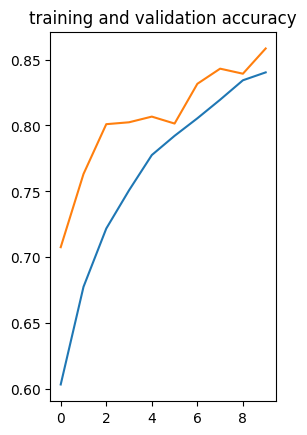

In [13]:
EPOCHS=10
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
loss = history.history['val_loss']
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training accuracy')
plt.plot(range(EPOCHS),val_acc,label='validation accuracy')
#plt.legand(loc = 'lower right')
plt.title('training and validation accuracy')
plt.show()

# Testing

first predict image
actual label: normal
1/1 [==============================] - 0s 112ms/step
covid
[0.6951831]


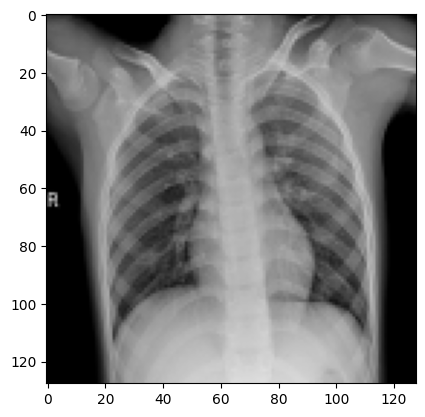

In [19]:
for image_batch, labels_batch in test_ds.take(1):
    first_image=image_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    print("first predict image")
    plt.imshow(first_image)
    print("actual label:", class_name[first_label])
    batch_prediction = model.predict(image_batch)
    if(batch_prediction[0]>0.5):
        print("covid")
    else:
        print("normal")

    print(batch_prediction[0] )
    #break;
   # print(class_name[np.argmax(batch_prediction[0])])